<a href="https://colab.research.google.com/github/aestongeasu/MAT421/blob/main/ModuleHPart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Write a function myRK4(ds,tspan,s0)
, where the input and output arguments are the same as in problem 5. The function myRK4
 should numerically integrate ds using the fourth-order Runge-Kutta method

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import ndarray
from scipy.integrate import solve_ivp

def myRK4(ds, tspan, s0):
  h = tspan[2] - tspan[1]
  length = len(tspan)
  rows, cols = (length, 1)
  S = [[0]*cols]*rows
  for i in range(0, length - 1):
    k1 = ds(tspan[i], S[i]).conj().T
    k2 = ds(tspan[i]+h/2, S[i] + k1*h/2).conj().T
    k3 = ds(tspan[i]+h/2, S[i] + k2*h/2).conj().T
    k4 = ds(tspan[i]+h, S[i] + k3*h).conj().T
    x = (k1+2*k2+2*k3+k4)/6;
    S[i+1] = S[i] + x*h;
  return[tspan, S]


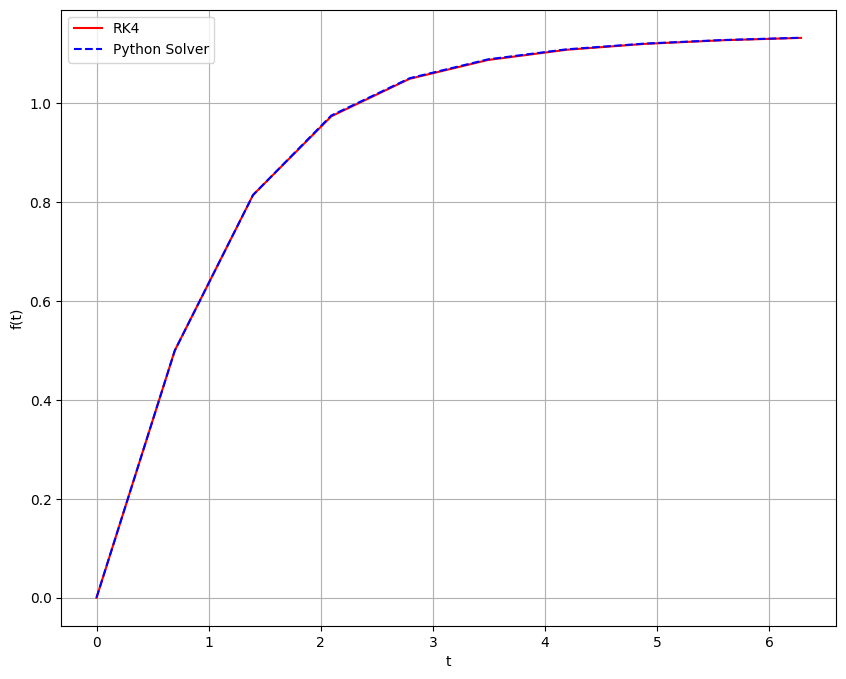

In [29]:
f = lambda t, s: np.sin(np.exp(s))/(t+1)
t_span = np.linspace(0, 2*np.pi, 10)
s0 = 0

plt.figure(figsize = (10, 8))

# Runge-Kutta method
t, s = myRK4(f, t_span, s0)
plt.plot(t, s, 'r', label='RK4')

# Python solver
sol = solve_ivp(f, [0, 2*np.pi], [s0], t_eval=t)
plt.plot(sol.t, sol.y[0], \
         'b--', label='Python Solver')

plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc=2)
plt.show()